### Crossvalidation – po co, dlaczego działa?

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


iris = load_iris()

X, y, iris_classes = iris.data, iris.target, iris.target_names

In [2]:
import numpy as np

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()

kf = KFold(n_splits=5, shuffle=True, random_state=1)

models = []
scores = []

for fold_nr, (train_idx, test_idx) in enumerate(kf.split(X)):
  X_train = X[train_idx]
  X_test =X[test_idx]

  y_train = y[train_idx]
  y_test = y[test_idx]

  # skalowanie danych wejściowych, aby model lepiej działał
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  clf = SGDClassifier(random_state=1).fit(X_train, y_train)

  models.append(clf)
  scores.append(clf.score(X_test, y_test))


print("wyniki poszczególnych foldów: ", scores)
print("średni wynik wszystkich foldów: ", np.array(scores).mean())

wyniki poszczególnych foldów:  [0.8666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9, 0.9333333333333333]
średni wynik wszystkich foldów:  0.9199999999999999


### Wrapper

In [3]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# stworzenie klasyfikatora
clf = SGDClassifier(random_state=1)

# użycie metody cross_val_score do sprawdzenia
# działania naszego modelu na różnych podziałach
cv_score = cross_val_score(clf, X, y, cv=5)
print("wynik kroswalidacji: ", cv_score)
print("średni wynik wszystkich foldów: ", cv_score.mean())

wynik kroswalidacji:  [0.83333333 0.93333333 0.8        0.7        0.9       ]
średni wynik wszystkich foldów:  0.8333333333333334


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_classes=2,
    weights=[0.99, 0.01],
    flip_y=0,
    random_state=1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                    random_state=3)

train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])

print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=790, 1=10, Test: 0=200, 1=0


In [5]:
#Przykład podziału za pomocą stratyfikacji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                    random_state=3, stratify=y)
# summarize
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])

print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=792, 1=8, Test: 0=198, 1=2


In [6]:
# wcześniejszy przykład z użyciem stratifiedKFold
from sklearn.model_selection import StratifiedKFold

# stworzenie KFold obiektu z 5 foldami i tasowaniem danych
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

models = []
scores = []

# iteracja przez poszczególne foldy
# dodatkowy parametr y w metodzie split
for fold_nr, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train = X[train_idx]
    X_test =X[test_idx]

    y_train = y[train_idx]
    y_test = y[test_idx]

    # skalowanie danych wejściowych, aby model lepiej działał
    # skalowanie danych wewnątrz poszczeŋólnych iteracji
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # stworzenie klasyfikatora dla poszczególnej iteracji
    # wytrenowanie klasyfikatora na danych treningowych
    clf = SGDClassifier(random_state=1).fit(X_train, y_train)
    
    # dodawanie klasyfikatora do tablicy klasyfikatorów
    models.append(clf)
    # dodawanie wyniku dla danych testowych do tablicy
    scores.append(clf.score(X_test, y_test))

In [7]:
print("wyniki poszczególnych foldów: ", scores)
print("średni wynik wszystkich foldów: ", np.array(scores).mean())

wyniki poszczególnych foldów:  [0.995, 0.985, 0.975, 0.965, 0.99]
średni wynik wszystkich foldów:  0.982


### Clustering

### Definicja

In [8]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

data = load_wine()
X = data.data
y = data.target

In [9]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [10]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

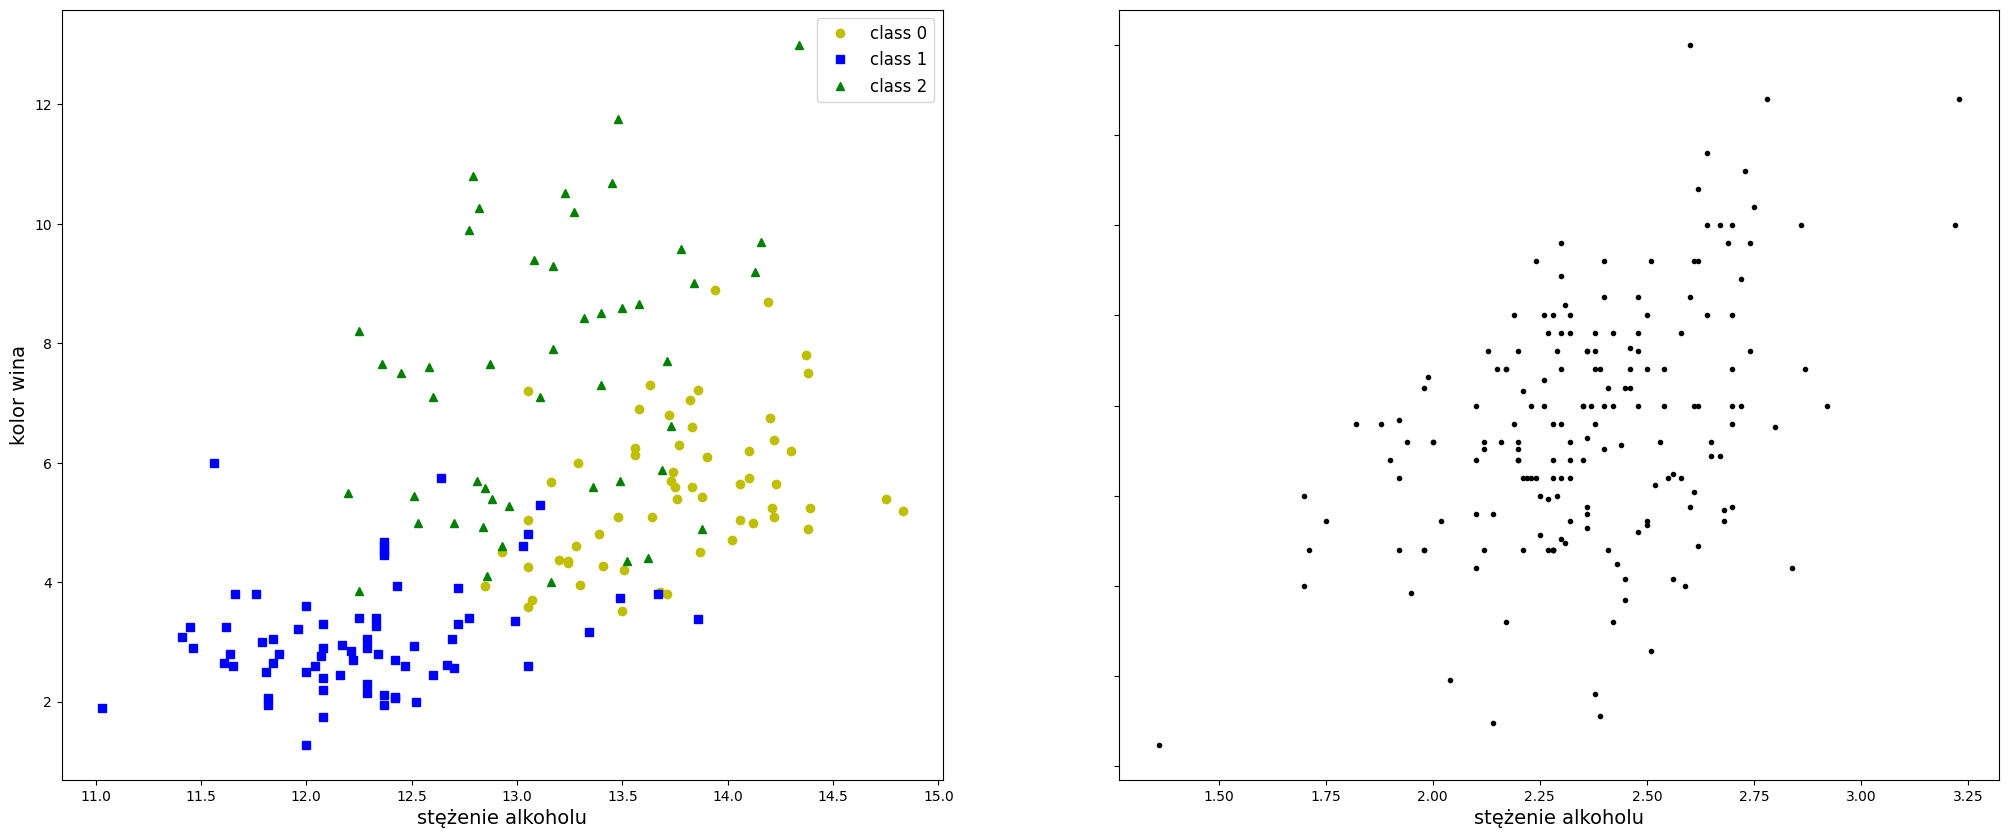

In [11]:
# przykład podziału dancyh w przypadku Supervised Learning oraz Clusteringu

plt.figure(figsize=(25, 10))

plt.subplot(121)
plt.plot(X[y==0, 0], X[y==0, 9], "yo", label="class 0")
plt.plot(X[y==1, 0], X[y==1, 9], "bs", label="class 1")
plt.plot(X[y==2, 0], X[y==2, 9], "g^", label="class 2")
plt.xlabel("stężenie alkoholu", fontsize=14)
plt.ylabel("kolor wina", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("stężenie alkoholu", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

### Podstawowe metody (KMeans)

In [12]:
import numpy as np

from sklearn.datasets import make_blobs

# środki naszych klastrów

centroids = np.array(
    [[ 0.8,  2.0],
     [-0.5 ,  2.0],
     [-2.0,  2.0],
     [-2.5,  2.5],
     [-2.5,  1.0]])

# wprowadzenie szumu do naszych klastrów, aby rozrzucić próbki
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# stworzenie zbioru danych
X, y = make_blobs(n_samples=3000, centers=centroids,
                  cluster_std=blob_std, random_state=7)

In [13]:
def plot_clusters(X, y=None):
    plt.figure(figsize=(15, 10))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=15)
    plt.ylabel("$x_2$", fontsize=15, rotation=0)
    plt.grid()

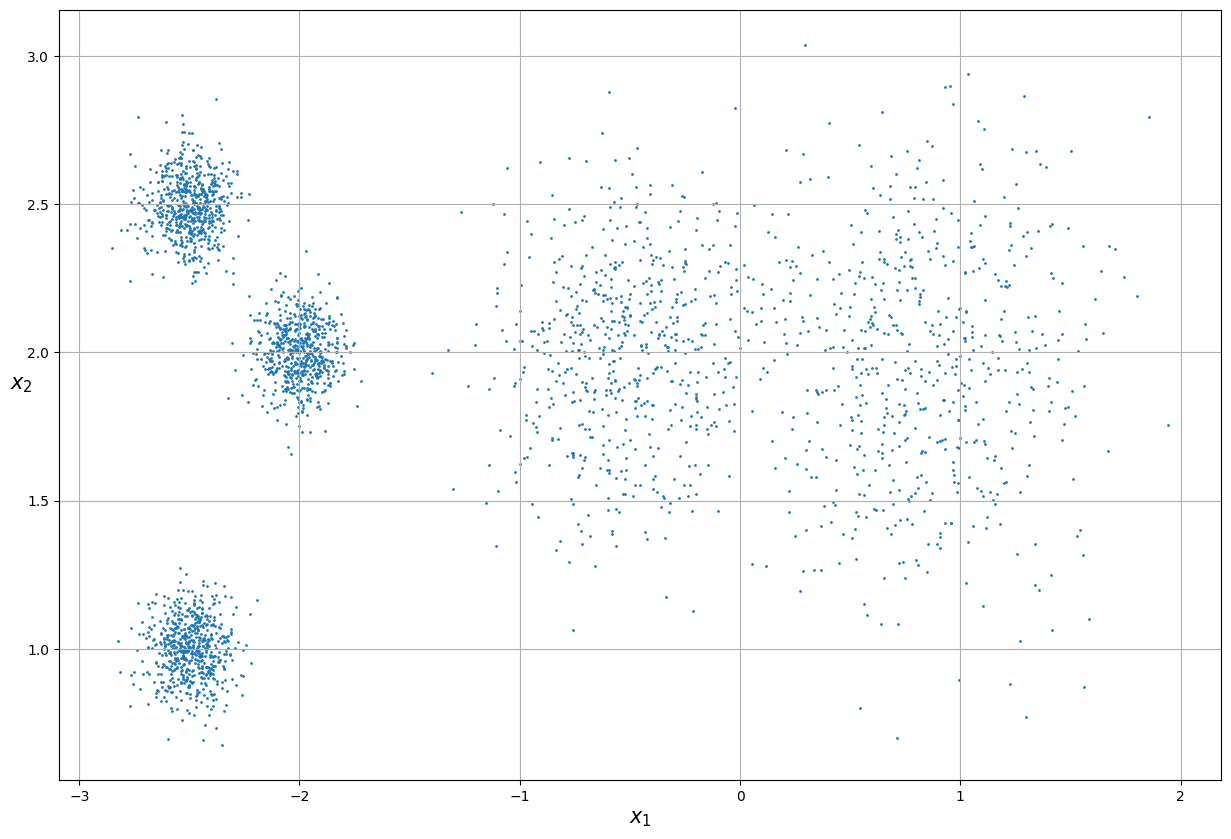

In [14]:
plot_clusters(X)

In [15]:
# import odpowiedniej biblioteki
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=5)

# możemy uzyć metod fit(), predict() 
clf.fit(X)
y_pred = clf.predict(X)

#albo metody fit/predict, która łączy dwie powyższe

y_pred = clf.fit_predict(X)
print(y_pred)

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 3 ... 1 3 4]


In [16]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=3, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # rysowanie konturów granic 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    # rysowanie danych
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

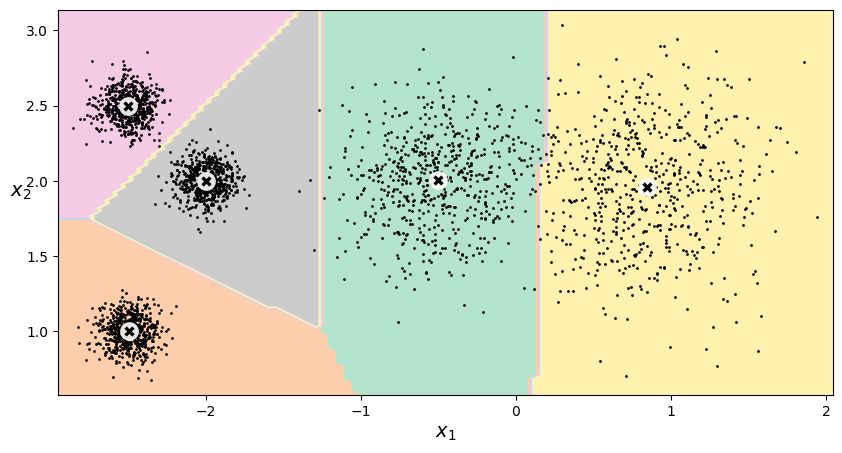

In [17]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(clf, X)
plt.show()

In [18]:
clf.cluster_centers_

array([[-0.50272248,  2.00353577],
       [-2.4969983 ,  0.99834723],
       [-2.50172193,  2.49446936],
       [ 0.84611988,  1.95575377],
       [-1.99702059,  1.99984058]])

### Zasada działania KMeans

In [19]:
# poszczególne kroki 

clf_1 = KMeans(n_clusters=5, max_iter=1, init="random", n_init=1, algorithm="lloyd", random_state=42)
clf_2 = KMeans(n_clusters=5, max_iter=2, init="random", n_init=1, algorithm="lloyd", random_state=42)
clf_3 = KMeans(n_clusters=5, max_iter=3, init="random", n_init=1, algorithm="lloyd", random_state=42)
clf_300 = KMeans(n_clusters=5, max_iter=300, init="random", n_init=1, algorithm="lloyd", random_state=42)
clf_1.fit(X)
clf_2.fit(X)
clf_3.fit(X)
clf_300.fit(X)

KMeans(init='random', n_clusters=5, n_init=1, random_state=42)

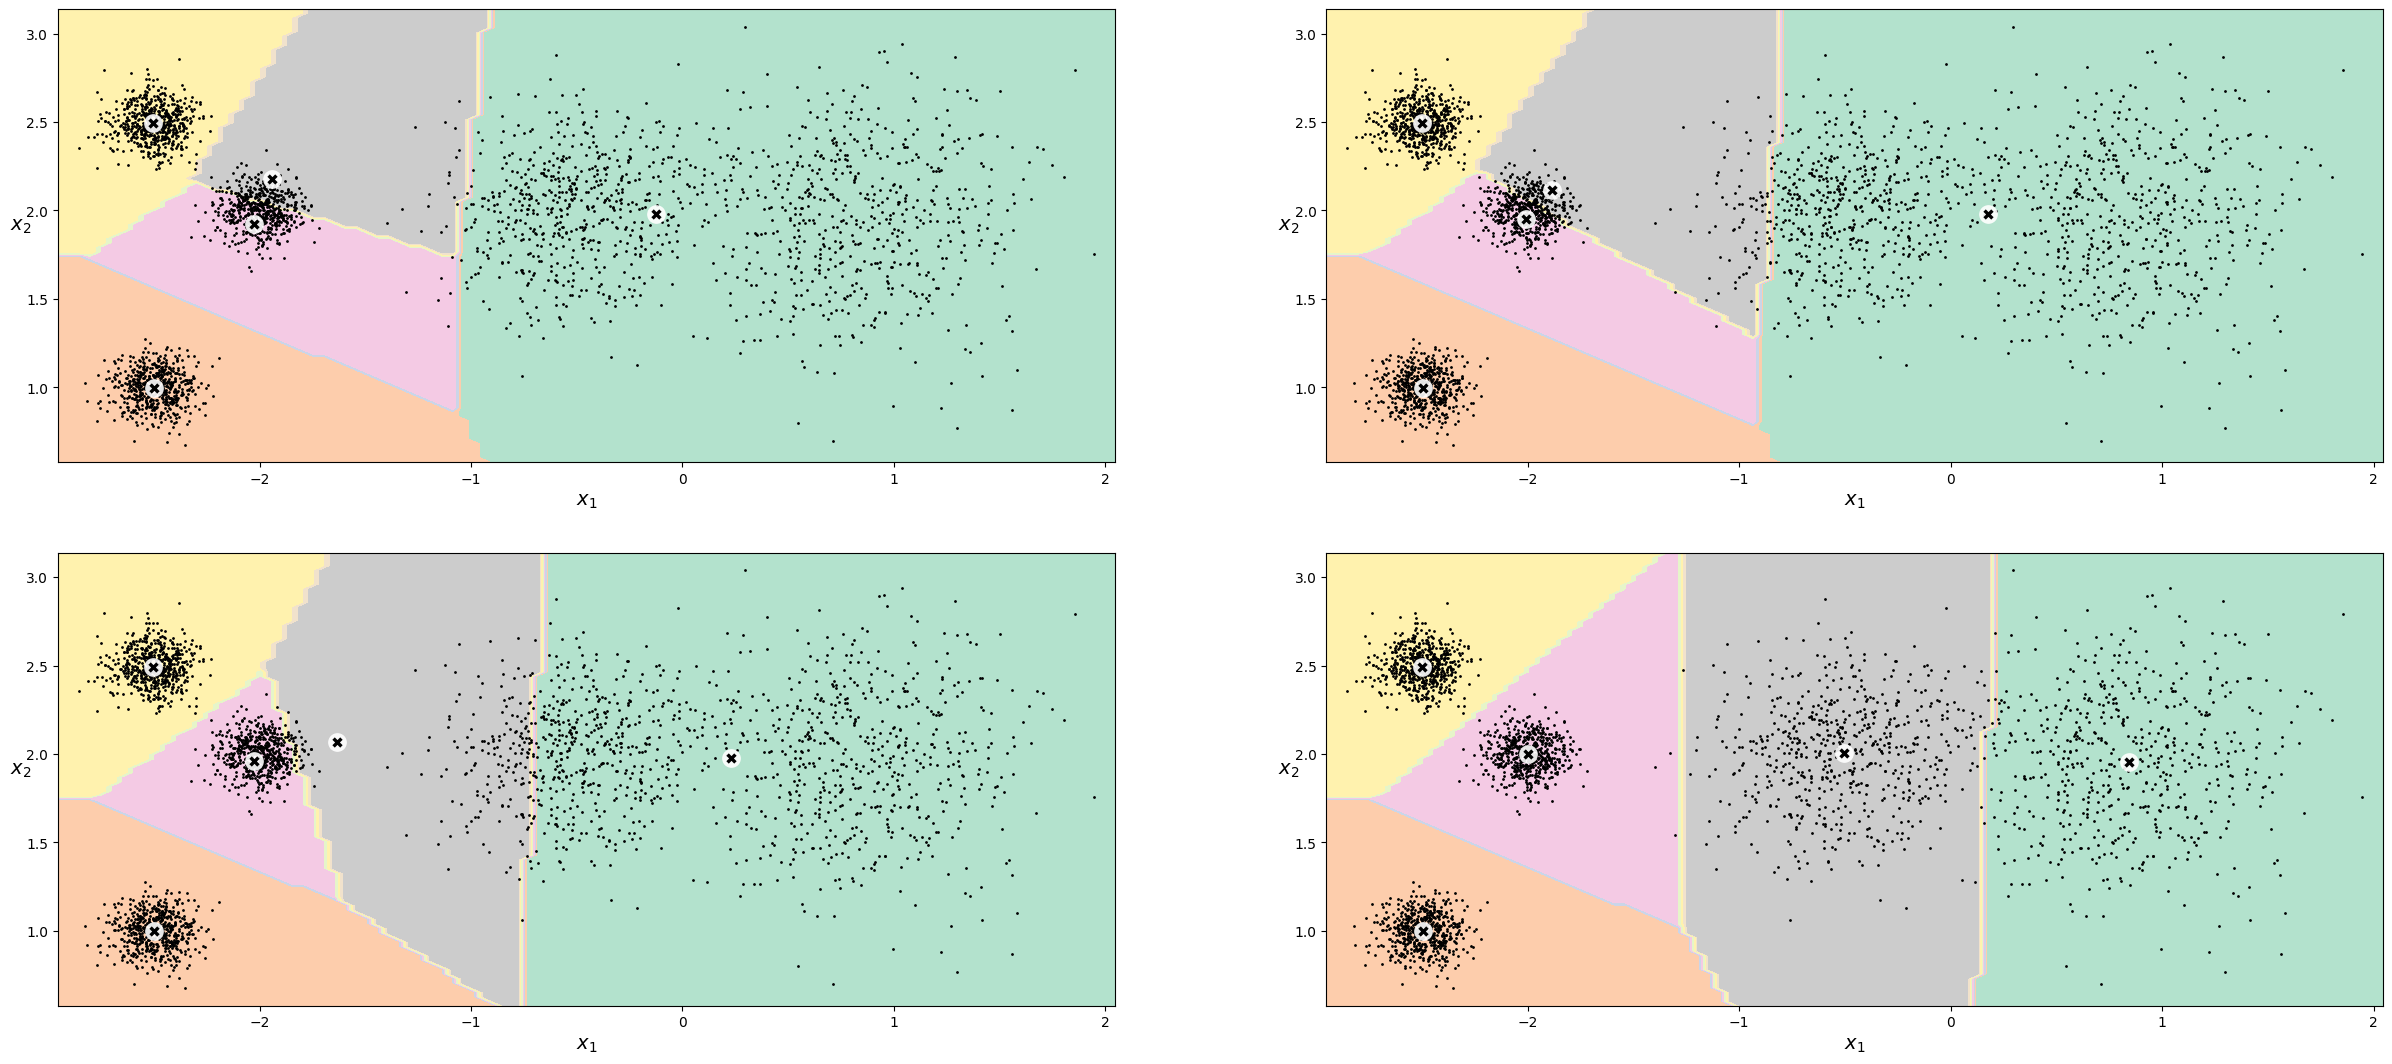

In [20]:
# narysujmy teraz poszczególne kroki jeden pod drugim

plt.figure(figsize=(30, 20))

plt.subplot(321)
plot_decision_boundaries(clf_1, X)

plt.subplot(322)
plot_decision_boundaries(clf_2, X)

plt.subplot(323)
plot_decision_boundaries(clf_3, X)

plt.subplot(324)
plot_decision_boundaries(clf_300, X)
plt.show()

### Szybsze wersje KMeans

In [21]:
# KMeans vs MiniBatchKMeans

# import odpowiedniej biblioteki
from sklearn.cluster import KMeans, MiniBatchKMeans

# K-means CLustering

from sklearn.datasets import make_blobs
import numpy as np

centroids = np.array(
    [[ 0.8,  20.0],
     [-0.5 ,  20.0],
     [-20.0,  20.0],
     [-20.5,  20.5],
     [-20.5,  10.0]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=3000000, centers=centroids,
                  cluster_std=blob_std, random_state=7)

In [22]:
from sklearn.cluster import MiniBatchKMeans

%timeit

# metoda MiniBatchKMeans
MBKMeans_clf = MiniBatchKMeans(n_clusters=5, max_iter=10, random_state=1)
%timeit MBKMeans_clf.fit(X)

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `

191 ms ± 2.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
from sklearn.cluster import KMeans

%timeit

# metoda KMeans
KMeans_clf = KMeans(n_clusters=5, max_iter=10, random_state=1)
%timeit KMeans_clf.fit(X)

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

7.41 s ± 260 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Jak dobrać ilość klastrów?

In [24]:
# dobieranie najlepszej wartości K

centroids = np.array(
    [[ 0.8,  2.0],
     [-0.5 ,  2.0],
     [-2.0,  2.0],
     [-2.5,  2.5],
     [-2.5,  1.0]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=3000, centers=centroids,
                  cluster_std=blob_std, random_state=7)
                  
#1 Tworzymy 19 algorytmów z k od 1 do 19
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(X)
    for k in range(2, 20) # zaczynamy od wartości n_clusters wynoszącej 2, gdyż nie ma sensu dzielenia zbioru dla 1 klastra
]

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

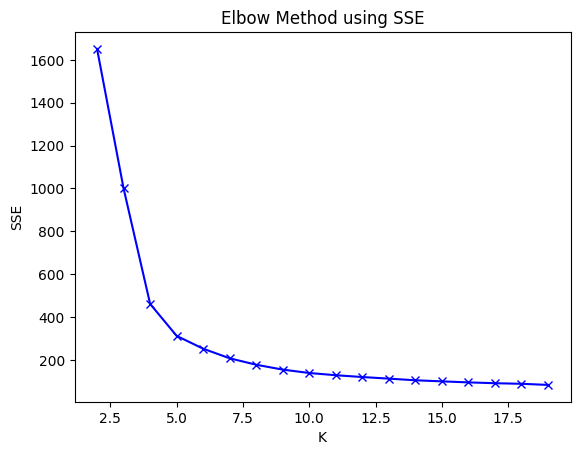

In [25]:
import matplotlib.pyplot as plt
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 20), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

In [26]:
#2. Używamy tzw silhouette_score

from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k]

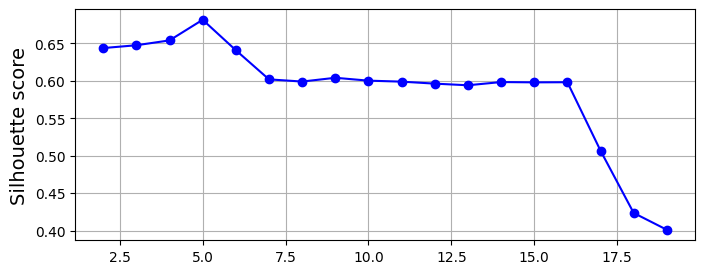

In [27]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

### Praktyczne użycie KMeans

### Ćwiczenie

In [28]:
# Ćwiczenie KMeans jako preprocessing danych
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Wczytaj dataset digits
X_digits, y_digits = load_digits(return_X_y=True)

# Podziel go na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=2)

# Użyj prostego klasyfikatora LogisticRegression, aby przewidzieć jaką cyfrę przedstawia 
# obrazek i wypisz uzyskany wynik (użyj multi_class="ovr")
log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)
log_reg.fit(X_train, y_train)
print("Bez KMeans :", log_reg.score(X_test, y_test))

# Utwórz pipeline składający się z: 
# - KMeansClustering z ilością klastrów znacznie większą od ilości klas w zbiorze 
# (w praktyce o wiele lepiej działa stworzenie większej ilości klastrów niż chcemy 
# przewidzieć klas) 
# - oraz LogisticRegression
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=40, random_state=2)),
    ("log_reg", LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)),
])

# Naucz taki pipeline i wypisz wynik
pipeline.fit(X_train, y_train)
print("Z KMeans :", pipeline.score(X_test, y_test))

Bez KMeans : 0.9466666666666667


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Z KMeans : 0.9577777777777777


In [29]:
# Widać, że użycie preprocessingu w postaci KMeans powoduje poprawienie wyniku.

### DBSCAN

In [30]:
#DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# tworzymy zbiór moon
X, y = make_moons(n_samples=1000, noise=0.08)

# tworzymy pierwszy klasyfikator DBSCAN z eps = 0.05
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

# drugi DBSCAN z eps = 0.2 (większy epsilon, większa przestrzeń wokół)
dbscan_2 = DBSCAN(eps=0.2, min_samples=5)
dbscan_2.fit(X)

DBSCAN(eps=0.2)

In [31]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], 
                marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), 
                fontsize=14)

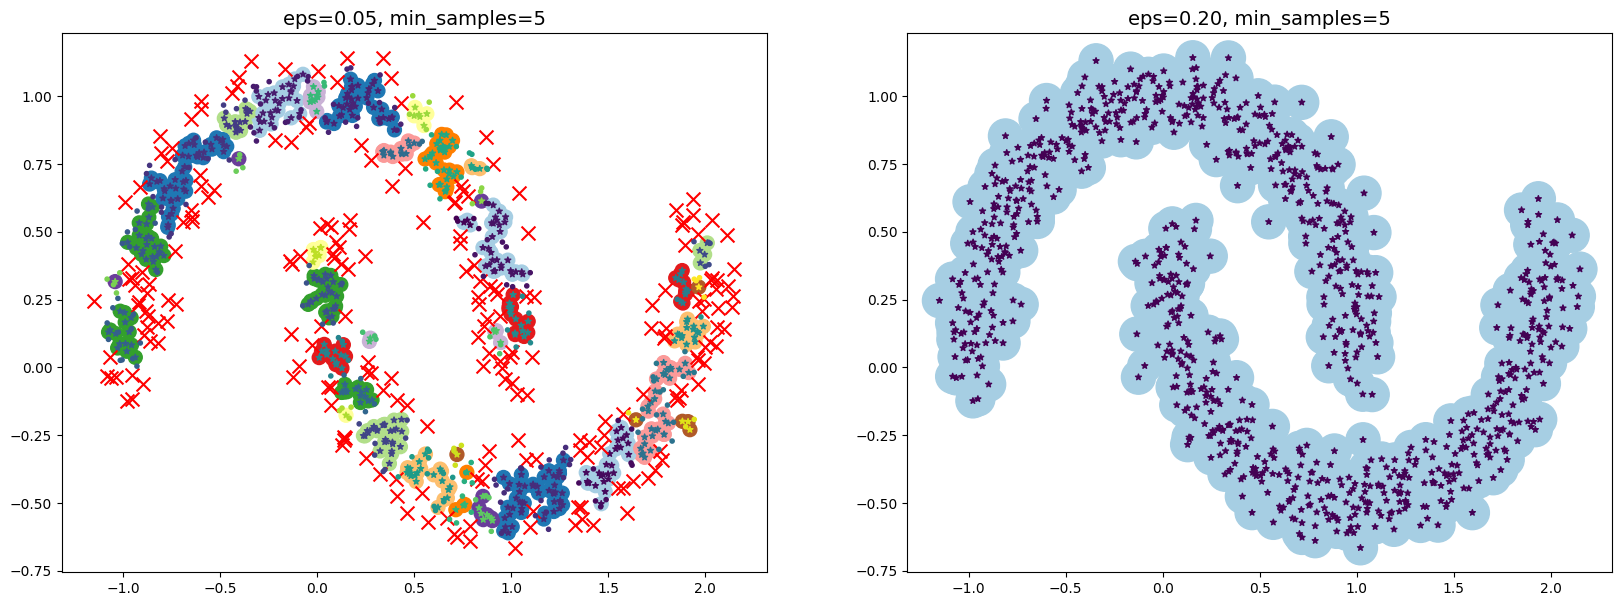

In [32]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan_2, X, size=600)

plt.show()


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


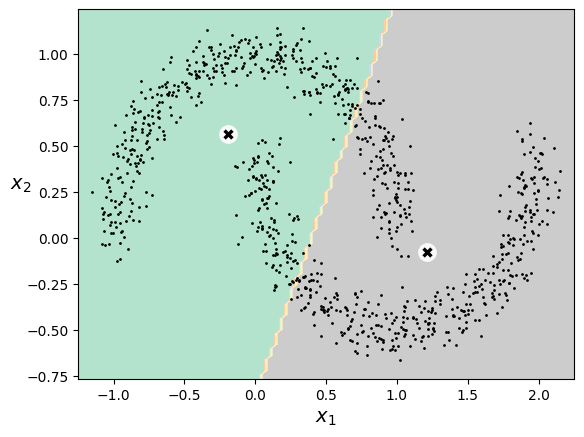

In [33]:
KMeans_clf = KMeans(n_clusters=2, max_iter=100000)
KMeans_clf.fit(X)

plot_decision_boundaries(KMeans_clf, X)

### Gaussian Mixture Models (GNN)

In [34]:
from sklearn.datasets import make_blobs
import numpy as np

# tworzymy "bloby", czyli grupy danych
X1, y1 = make_blobs(n_samples=800, centers=((2, -2), (-2, 2)), random_state=2)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=200, centers=1, random_state=42)
X2 = X2 + [6, -8]

# przydatna metoda NumPy r_ - służy do składania dwóch tablic wg wybranej osi
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [35]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [36]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

# metoda zaporzyczona z przykładów sklearn oraz lekko zmodyfikowana 
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

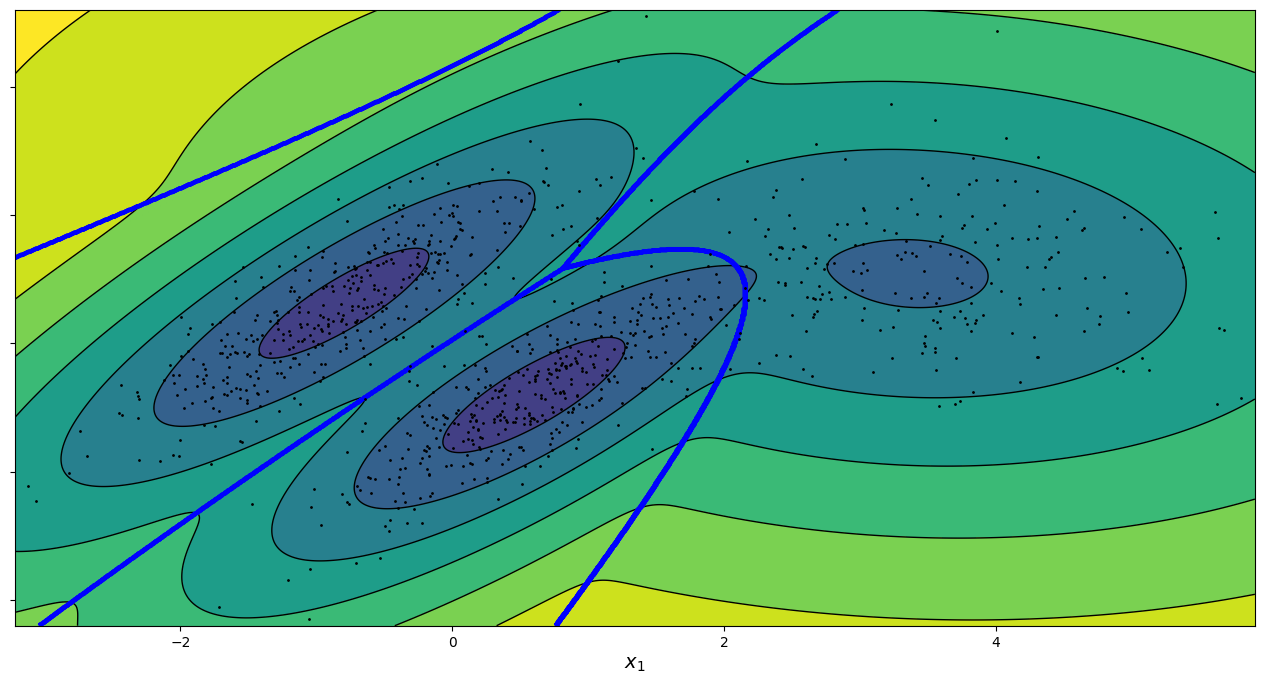

In [37]:
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

In [38]:
gm.converged_

True

In [39]:
gm.n_iter_

10

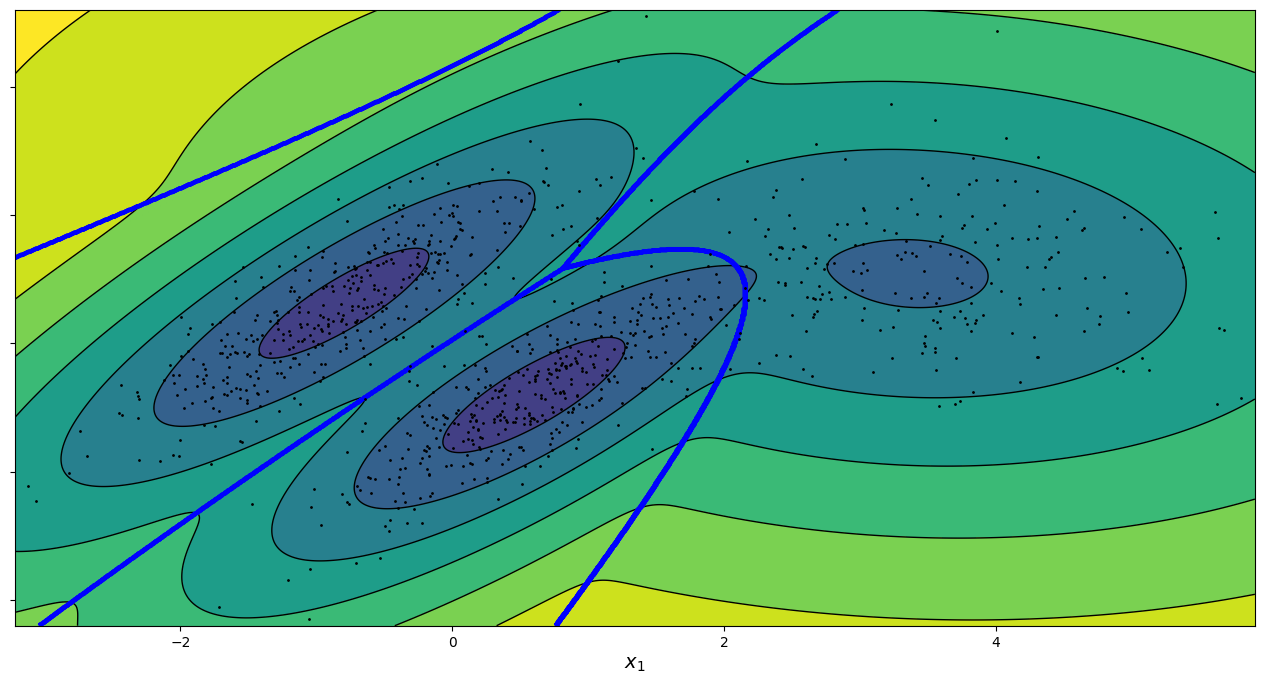

In [40]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42, covariance_type="full")
gm.fit(X)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

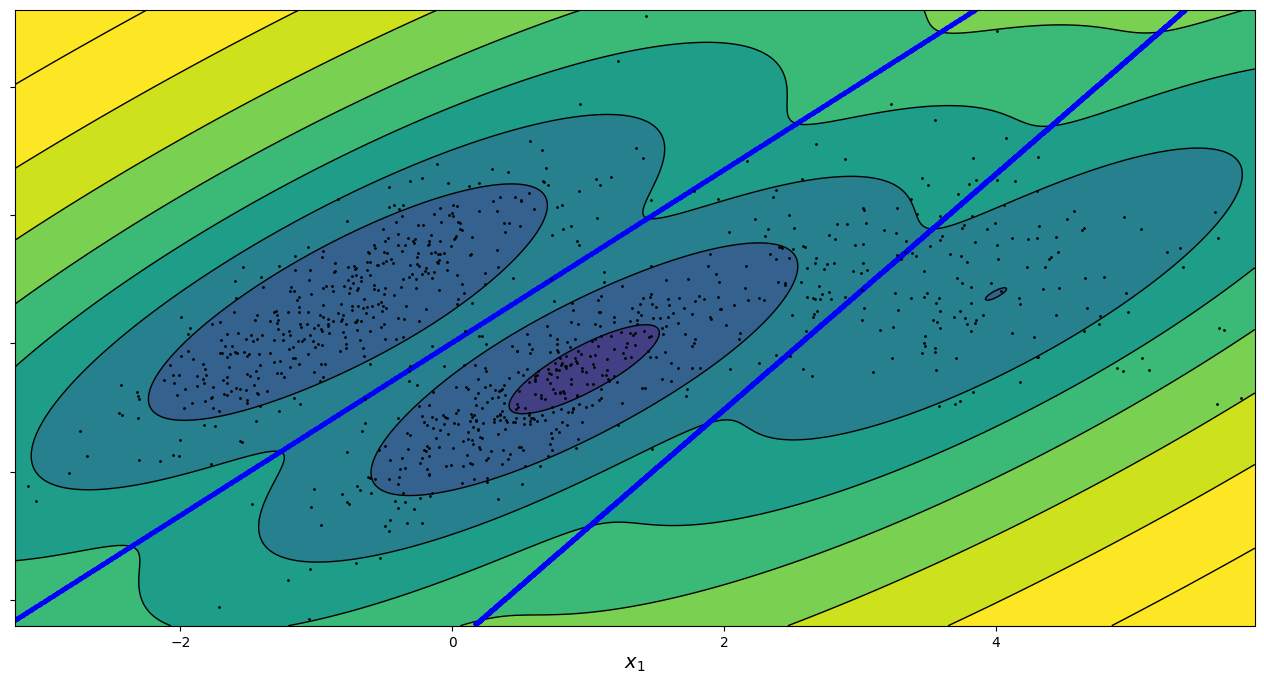

In [41]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42, covariance_type="tied")
gm.fit(X)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

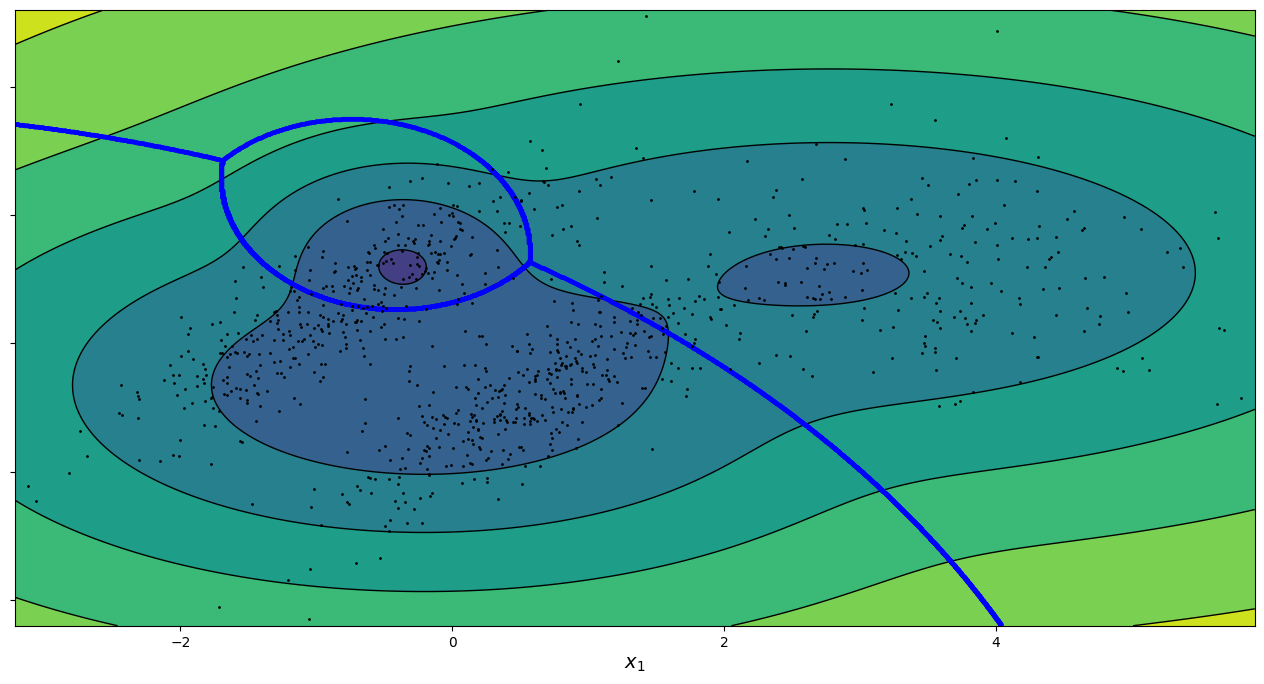

In [42]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42, covariance_type="diag")
gm.fit(X)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

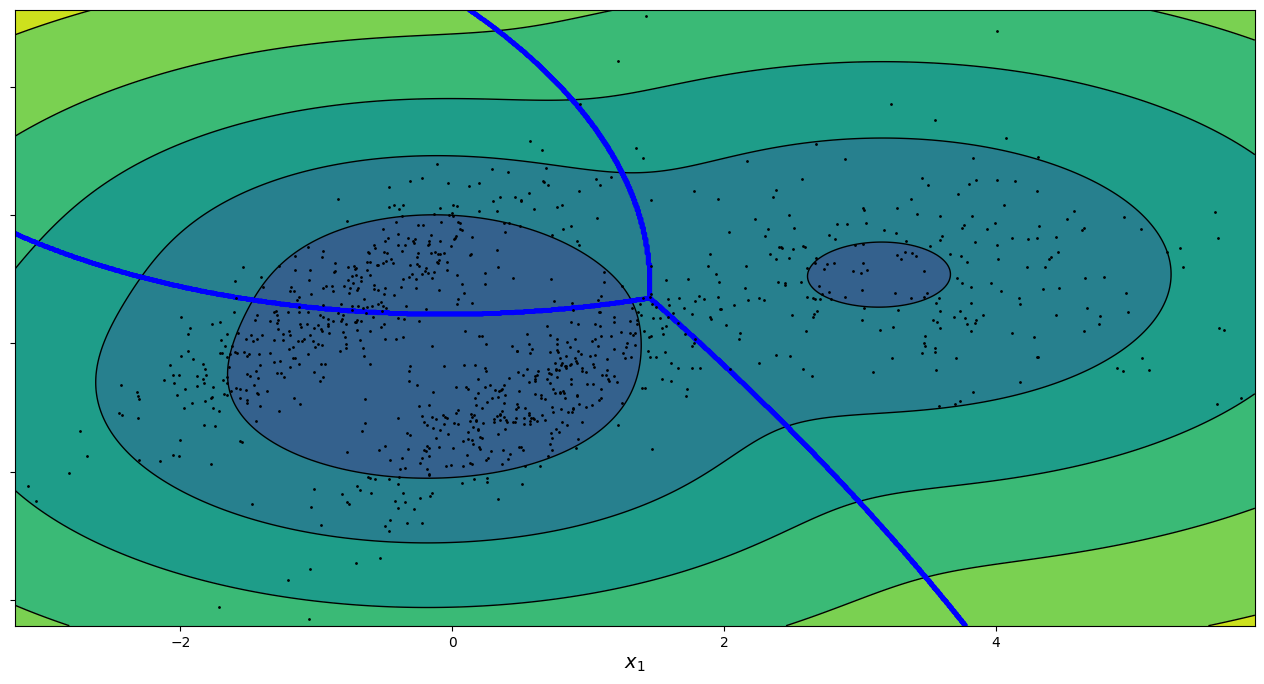

In [43]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42, covariance_type="spherical")
gm.fit(X)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

### GMM jako wykrywacz anomalii

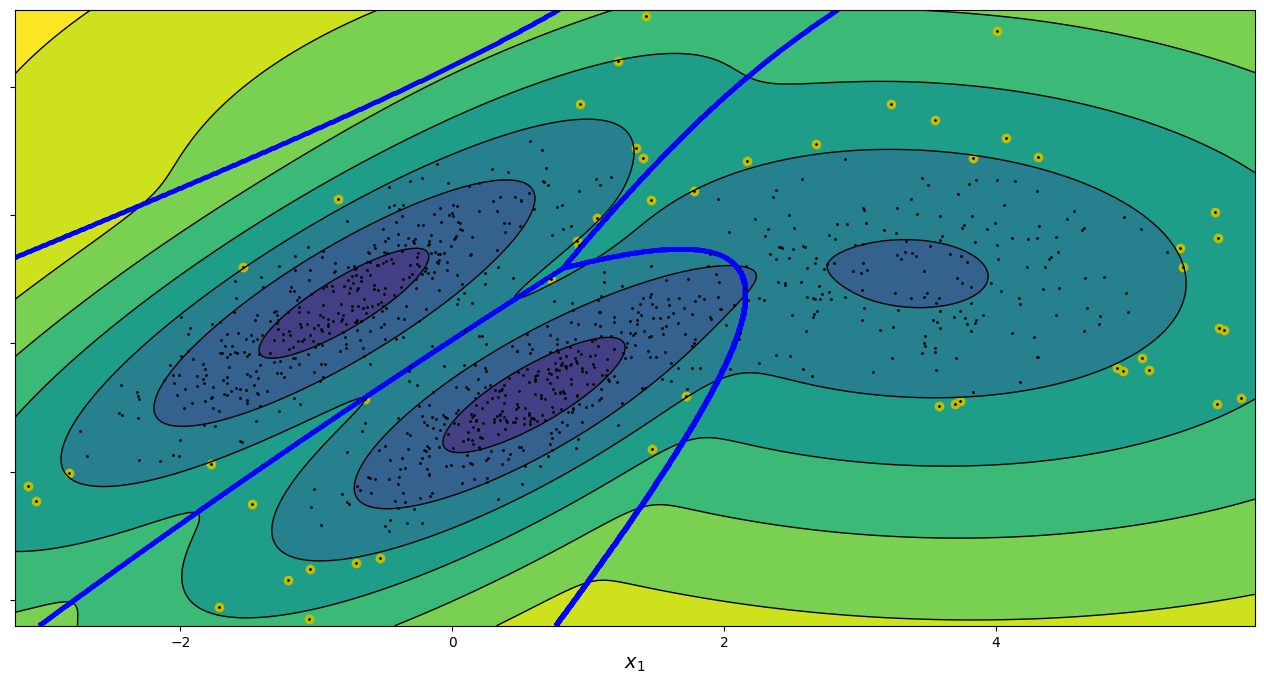

In [44]:
# rysujemy wykres jak poprzednio
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)

# odsiewanie anomalii
# Pobieramy wartości dla naszego zbioru, które
# mówią nam, jak bardzo element należy do klastrów
density = gm.score_samples(X)

# Tworzymy wartość graniczną, czyli threshold. 
# Wartości, które mają wyniki z poprzedniej linii mniejsze od naszego threshold, 
# są anomaliami, więc zostają odsiane
# W naszym przypadku chcemy odsiać 5% najgorszych wartości
threshold = np.percentile(density, 5)

# Odsiewamy te wartości poprzez proste porównanie
anomalie = X[density < threshold]

plt.scatter(anomalie[:, 0], anomalie[:, 1], color='y', marker='o')
plt.show()

# Redukcja wymiarowości

### Analiza głównych składowych

In [45]:
means = [2.13, -99, 0.11, -1.01] # cztery zmienne z innymi średnimi

# Macierz kowariancji
cov_matrix = np.array([[1, 0.96, 0, 0], [0.96, 1, 0, 0], [0, 0, 1, 0.87], [0, 0, 0.87, 1]])
print('Covariance matrix')
print(cov_matrix)

n=1000 # Liczba wierszy
df = np.random.multivariate_normal(means, cov_matrix, n)
print('Dataframe:')
print(df)

Covariance matrix
[[1.   0.96 0.   0.  ]
 [0.96 1.   0.   0.  ]
 [0.   0.   1.   0.87]
 [0.   0.   0.87 1.  ]]
Dataframe:
[[ 1.15426371e+00 -1.00026883e+02  3.41137355e-01 -4.44155189e-01]
 [ 3.49659392e+00 -9.77812980e+01  7.60173880e-01 -7.90092951e-01]
 [ 3.47439307e+00 -9.76766941e+01  2.28733128e-01 -2.53880676e-01]
 ...
 [ 1.21594857e+00 -9.98552820e+01  8.83472125e-01  4.74755411e-01]
 [ 2.37179769e+00 -9.90839816e+01 -1.53632735e+00 -1.64664929e+00]
 [-3.06666439e-01 -1.01492381e+02  2.78416241e+00  5.50137870e-02]]


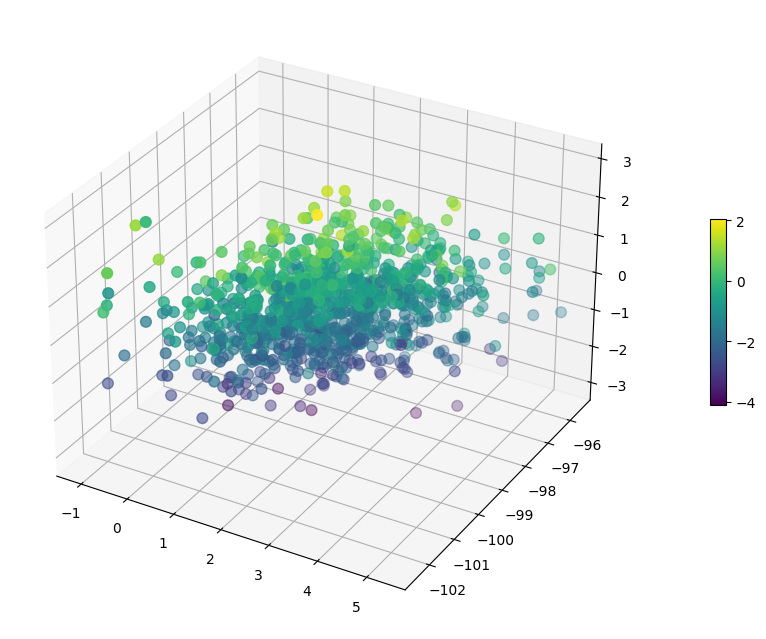

In [46]:
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=df[:,0], ys=df[:,1], zs=df[:,2], c=df[:,3], s=60)
cax = fig.add_axes([ax.get_position().x1+0.10, ax.get_position().y0+0.14, 0.02, 
                    ax.get_position().height*0.3])
fig.colorbar(img, cax=cax)
plt.show()

### Standaryzacja

In [47]:
print('Przed standaryzacją')
print('Średnia:\n',df.mean(axis=0))
print('Odchylenie standardowe:\n',df.std(axis=0))

# Standaryzacja
df_standardizated = (df - np.mean(df, axis=0)) / np.std(df, axis=0)

print('\nPo standaryzacji')
print('Średnia:\n',df_standardizated.mean(axis=0))
print('Odchylenie standardowe:\n',df_standardizated.std(axis=0))

Przed standaryzacją
Średnia:
 [ 2.12622045e+00 -9.89974702e+01  6.64256903e-02 -1.05884349e+00]
Odchylenie standardowe:
 [1.02612831 1.04423054 1.00244163 0.98514438]

Po standaryzacji
Średnia:
 [ 1.06981091e-15 -7.37618855e-14 -2.48689958e-17  1.77280413e-15]
Odchylenie standardowe:
 [1. 1. 1. 1.]


### Utworzenie macierzy kowariancji w oparciu o wystandaryzowaną macierz

In [48]:
covariance_matrix = np.cov(df_standardizated.T)
covariance_matrix

array([[1.001001  , 0.96054393, 0.04423484, 0.04133814],
       [0.96054393, 1.001001  , 0.04405076, 0.04505747],
       [0.04423484, 0.04405076, 1.001001  , 0.87484587],
       [0.04133814, 0.04505747, 0.87484587, 1.001001  ]])

In [49]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('Wartości własne:\n',eigenvalues,'\n\nWektory własne:\n',eigenvectors)

Wartości własne:
 [2.01598194 1.82141206 0.04041094 0.12619906] 

Wektory własne:
 [[-0.59975775 -0.37461365 -0.70690026 -0.01572502]
 [-0.60042647 -0.37342199  0.70694644  0.01645628]
 [-0.37431745  0.59988271  0.01540879 -0.70695809]
 [-0.373718    0.60030106 -0.01677259  0.70688908]]


### Wyjaśniona wariancja

In [50]:
explained_variance = [round((i/np.sum(eigenvalues)), 3) for i in sorted(eigenvalues, reverse=True)]
print(explained_variance)

[0.503, 0.455, 0.032, 0.01]


### Transformacja cech

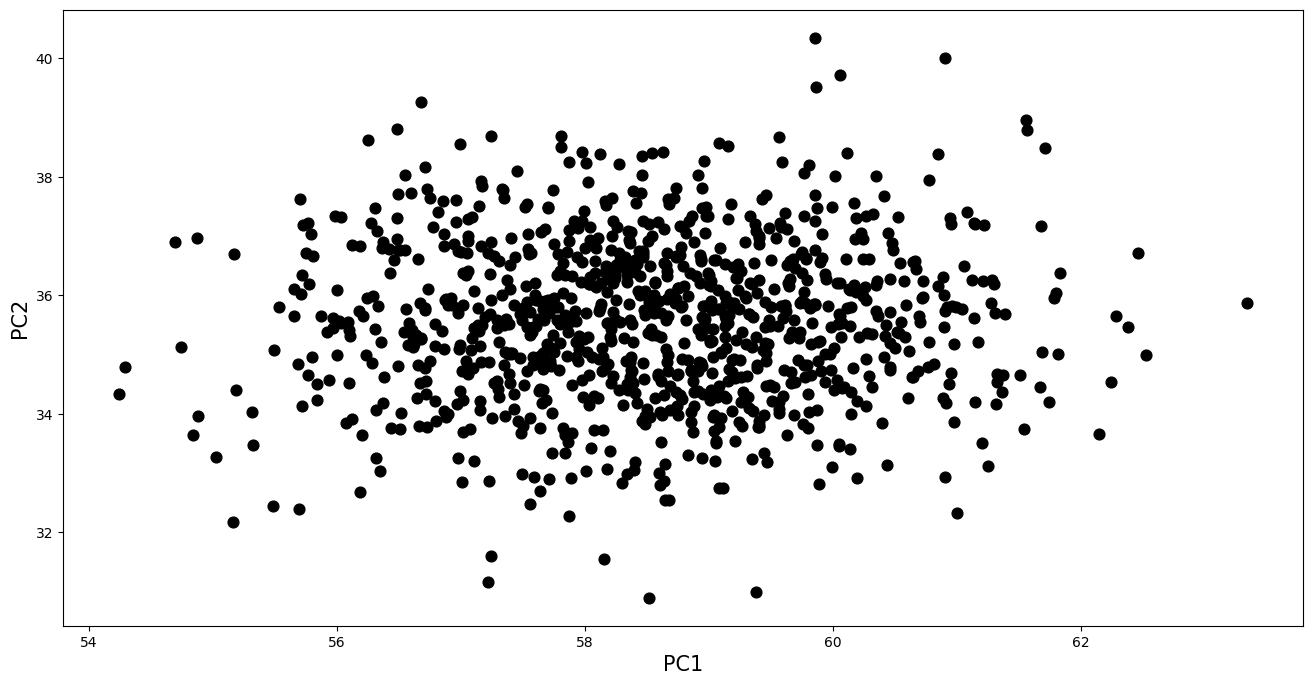

In [51]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs.sort(key = lambda k: k[0], reverse=True)
w = np.hstack((eigenpairs[0][1][:, np.newaxis],
               eigenpairs[1][1][:, np.newaxis]))
pc1 = df.dot(w.T[0])
pc2 = df.dot(w.T[1])
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.scatter(x=pc1, y=pc2, c='black', s=60)
ax.set_xlabel(xlabel='PC1', rotation=0, loc='center', size=15)
ax.set_ylabel(ylabel='PC2', rotation=90, loc='center', size=15)
plt.show()

### PCA - zastosowanie

In [52]:
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [53]:
iris['species'].value_counts()


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [54]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
X, y = iris[features], iris[target]


In [57]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Unique values: 35


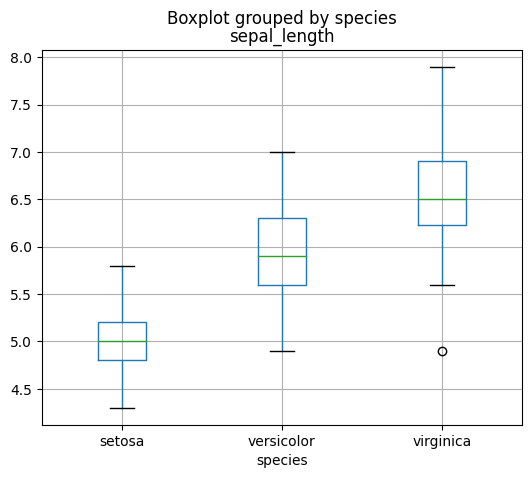

Unique values: 23


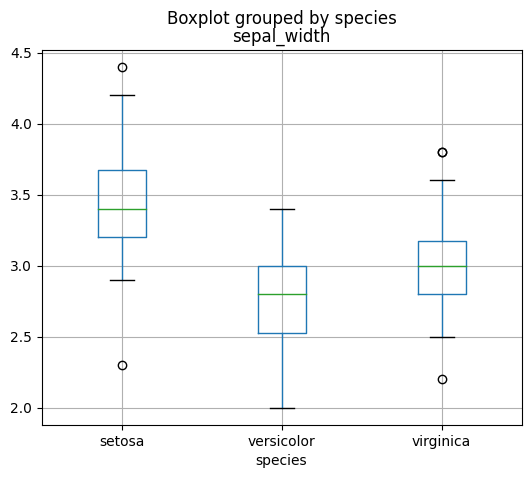

Unique values: 43


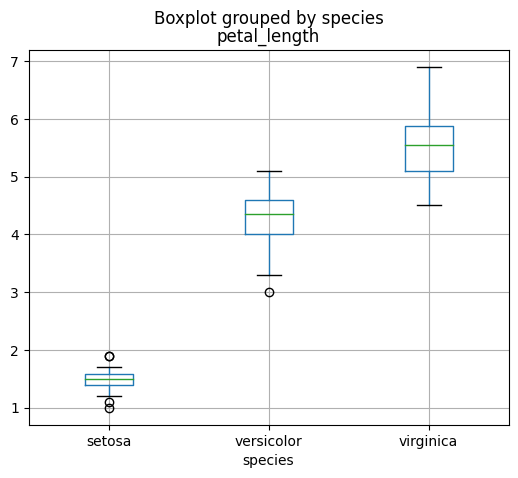

Unique values: 22


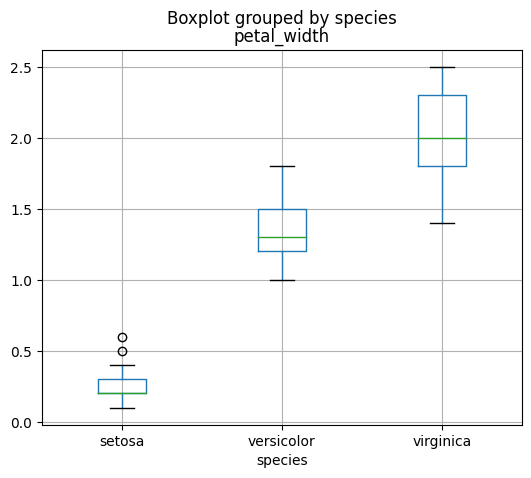

In [59]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values: {len(iris[col].unique())}')
    iris.boxplot(column=col, by='species', figsize=(6,5))
    plt.title(col)
    plt.show()

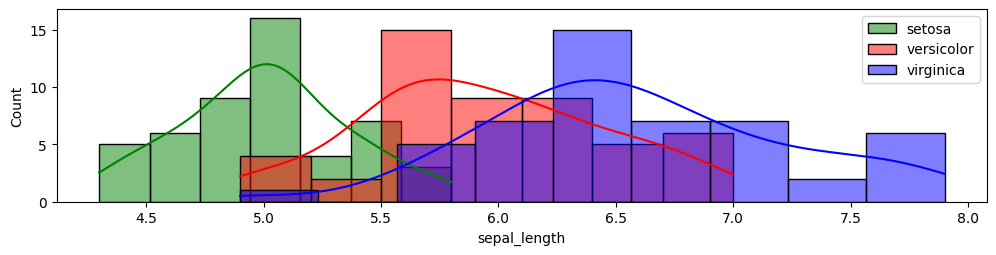

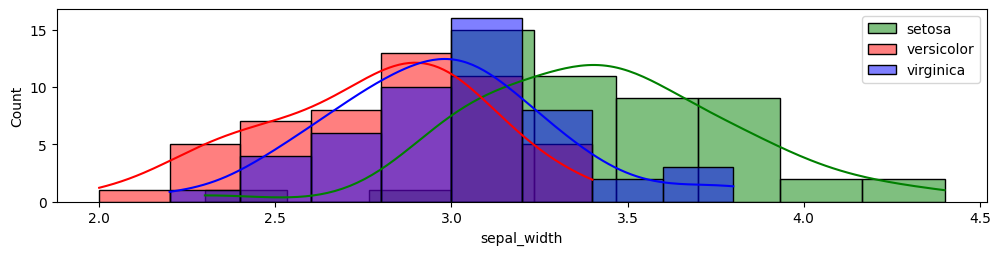

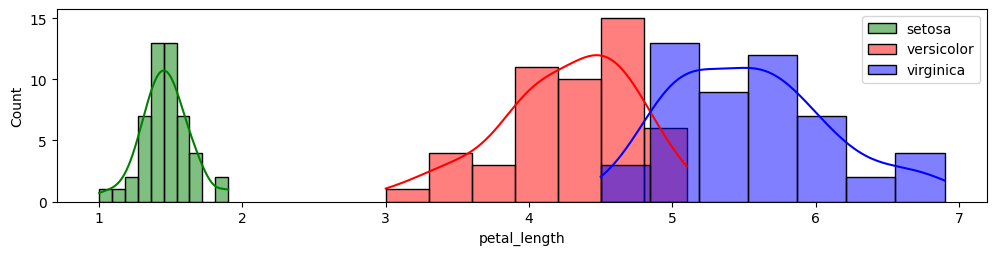

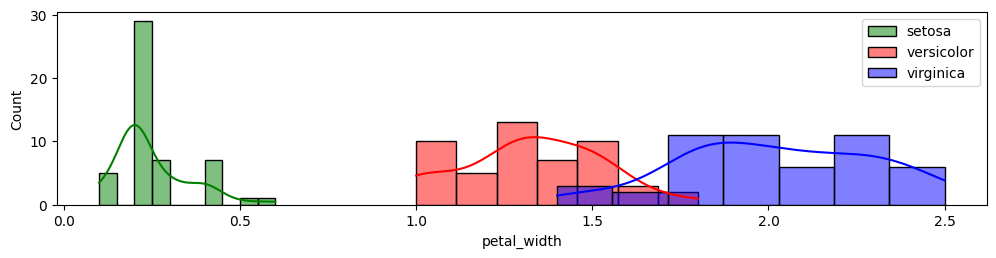

In [61]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.histplot(iris.loc[iris['species']=='setosa', col], kde=True, color='green', label='setosa')
    sns.histplot(iris.loc[iris['species']=='versicolor', col], kde=True, color='red', label='versicolor')
    sns.histplot(iris.loc[iris['species']=='virginica', col], kde=True, color='blue', label='virginica')
    plt.legend(loc='upper right')
    plt.show()

### Wizualizacja

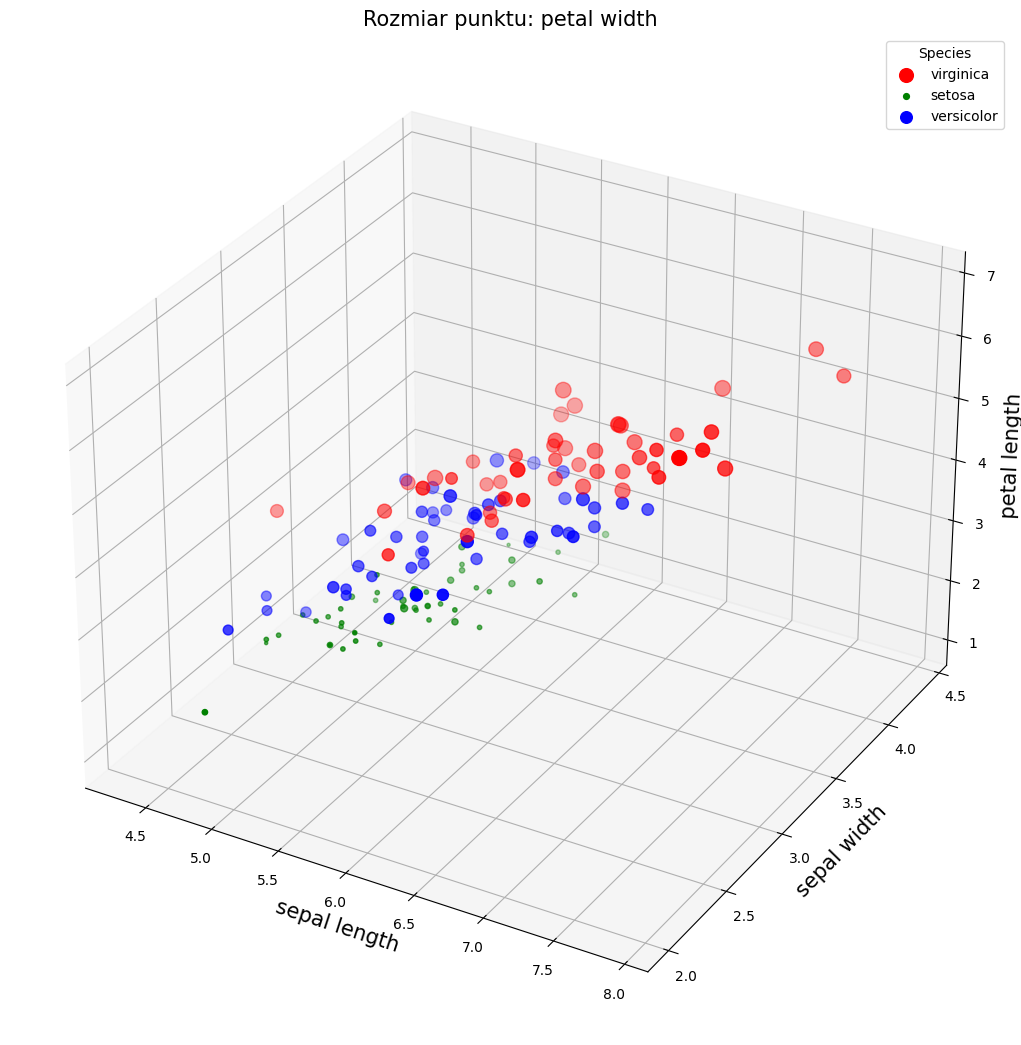

In [64]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=iris.loc[iris['species']=='virginica', 'sepal_length'],
                 ys=iris.loc[iris['species']=='virginica','sepal_width'],
                 zs=iris.loc[iris['species']=='virginica', 'petal_length'],
                 s=iris.loc[iris['species']=='virginica','petal_width']*50,
                 c='red', label='virginica')
img = ax.scatter(xs=iris.loc[iris['species']=='setosa', 'sepal_length'],
                 ys=iris.loc[iris['species']=='setosa','sepal_width'],
                 zs=iris.loc[iris['species']=='setosa', 'petal_length'],
                 s=iris.loc[iris['species']=='setosa','petal_width']*50,
                 c='green', label='setosa')
img = ax.scatter(xs=iris.loc[iris['species']=='versicolor', 'sepal_length'],
                 ys=iris.loc[iris['species']=='versicolor','sepal_width'],
                 zs=iris.loc[iris['species']=='versicolor', 'petal_length'],
                 s=iris.loc[iris['species']=='versicolor','petal_width']*50,
                 c='blue', label='versicolor')
ax.set_xlabel(xlabel='sepal length', size=15)
ax.set_ylabel(ylabel='sepal width', size=15)
ax.set_zlabel(zlabel='petal length', size=15)
ax.set_title('Rozmiar punktu: petal width', size=15)
plt.legend(title='Species')
plt.show()

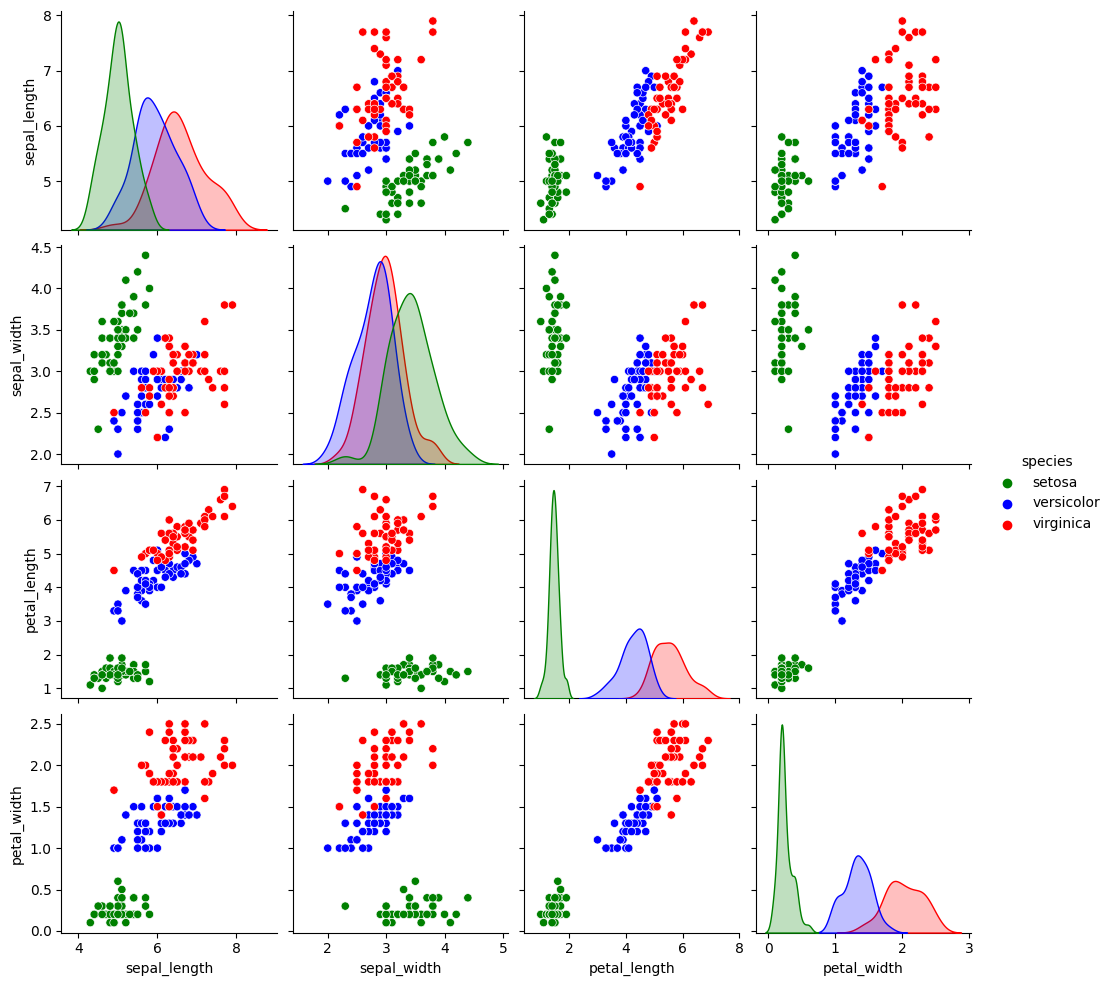

In [65]:
sns.pairplot(iris,
             hue='species',
             palette={'virginica': 'red', 'setosa': 'green', 'versicolor': 'blue'})
plt.show()

C:\Users\magda\AppData\Local\Temp\ipykernel_12236\4054187264.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(iris.corr(),
C:\Users\magda\AppData\Local\Temp\ipykernel_12236\4054187264.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  xticklabels=iris.corr().columns,
C:\Users\magda\AppData\Local\Temp\ipykernel_12236\4054187264.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  yticklabels=iris.corr().columns,


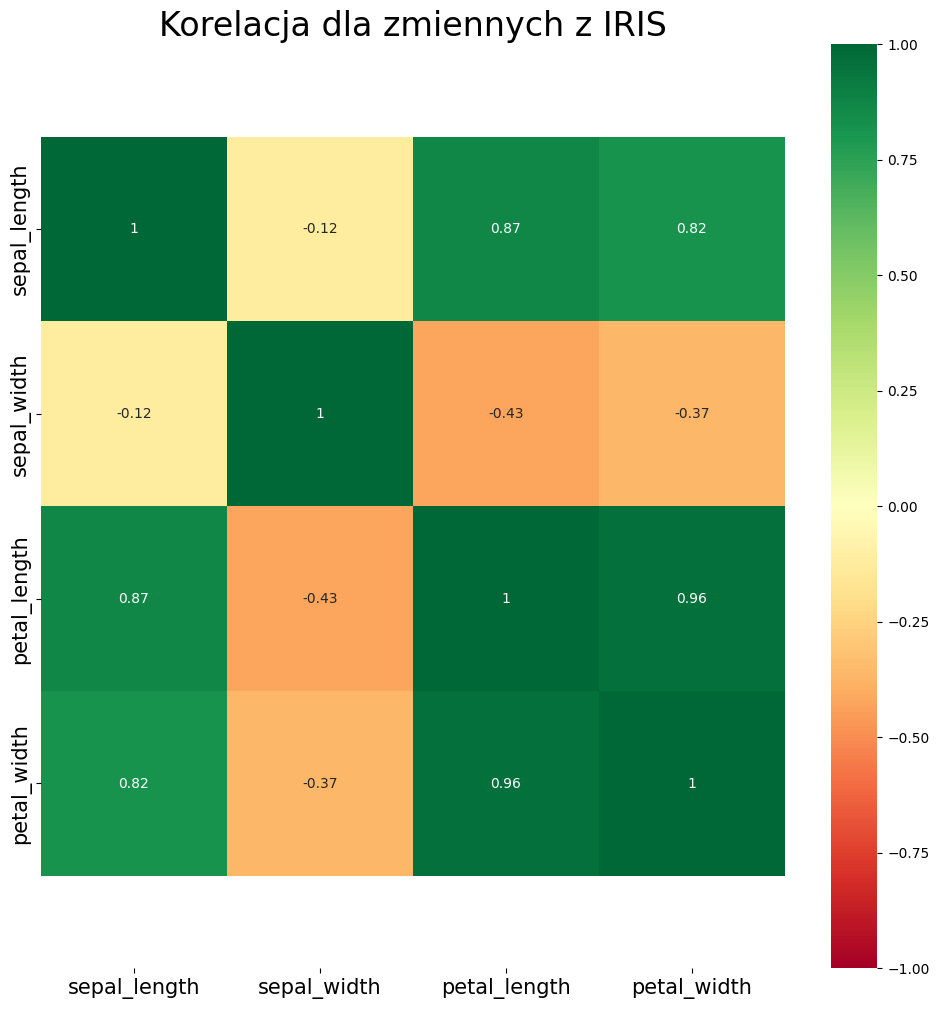

In [66]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(iris.corr(),
                 xticklabels=iris.corr().columns,
                 yticklabels=iris.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Korelacja dla zmiennych z IRIS', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = iris.drop('species', axis=1).copy()
y = iris['species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_iris = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_iris.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'species'},
                  inplace=True)
train_iris[['PC1', 'PC2','PC3','PC4']] = train_iris[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_iris.corr()

C:\Users\magda\AppData\Local\Temp\ipykernel_12236\1101239293.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_iris.corr()


,PC1,PC2,PC3,PC4
PC1,1.000000e+00,-1.652786e-16,-1.027043e-16,1.502571e-17
PC2,-1.652786e-16,1.000000e+00,2.786483e-16,-6.753963e-17
PC3,-1.027043e-16,2.786483e-16,1.000000e+00,-1.268203e-16
PC4,1.502571e-17,-6.753963e-17,-1.268203e-16,1.000000e+00


### Grupowanie cech – jakie zmienne przedstawiają tę samą informację

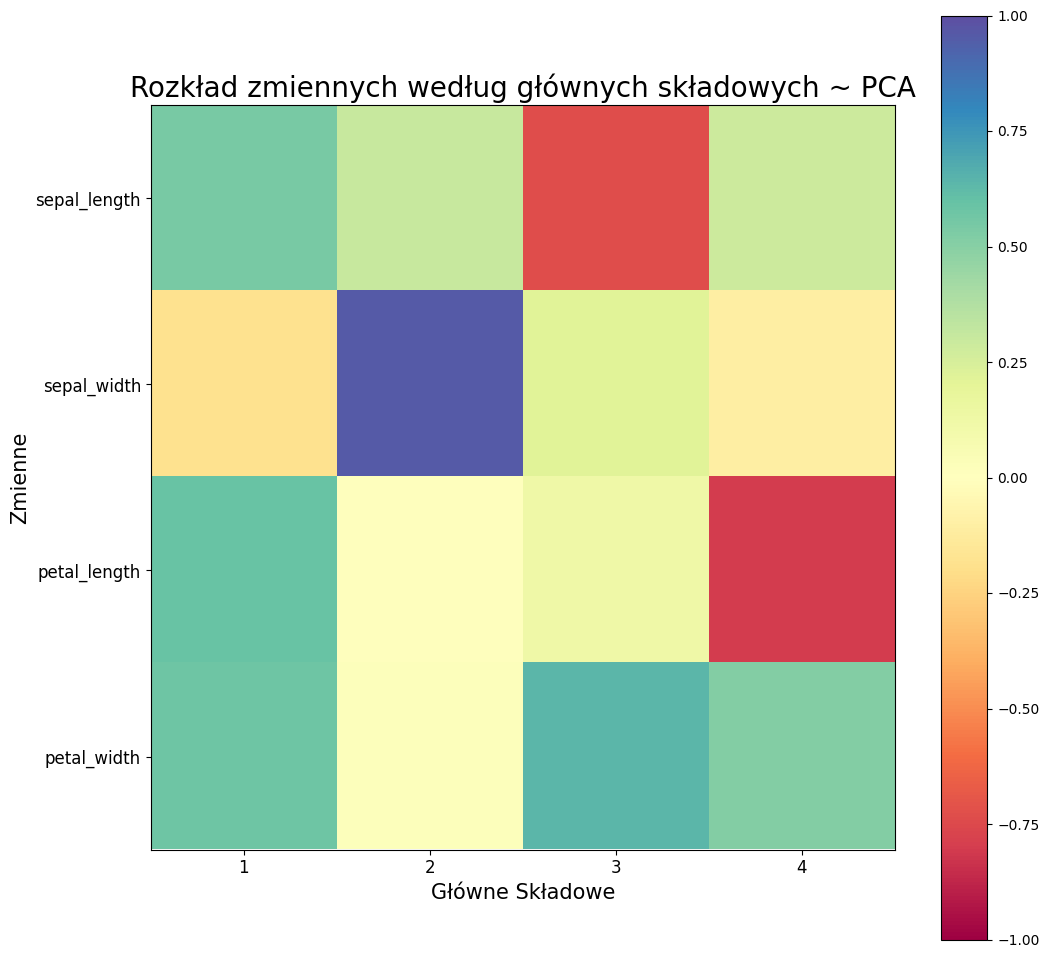

In [68]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(4), range(1, 5), fontsize=12)
plt.xlabel('Główne Składowe', fontsize=15)
plt.ylabel('Zmienne', fontsize=15)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=20)
plt.colorbar()
plt.show()

### Redukcja wymiaru bez znacznej utraty informacji

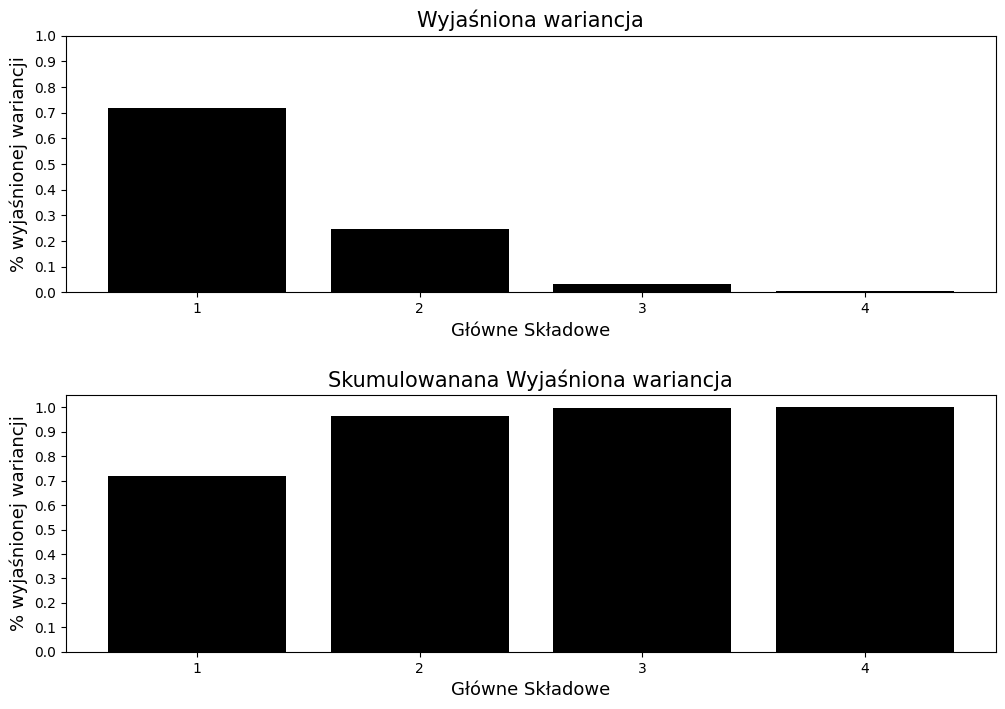

Główna składowa: 1, Wyjaśniona wariancja: 0.71702, Skumulowana Wyjaśniona wariancja: 0.71702
Główna składowa: 2, Wyjaśniona wariancja: 0.24713, Skumulowana Wyjaśniona wariancja: 0.96415
Główna składowa: 3, Wyjaśniona wariancja: 0.03156, Skumulowana Wyjaśniona wariancja: 0.99572
Główna składowa: 4, Wyjaśniona wariancja: 0.00428, Skumulowana Wyjaśniona wariancja: 1.0


In [69]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

### Wizualizacja wielowymiarowych danych z wykorzystaniem redukcji zmiennych

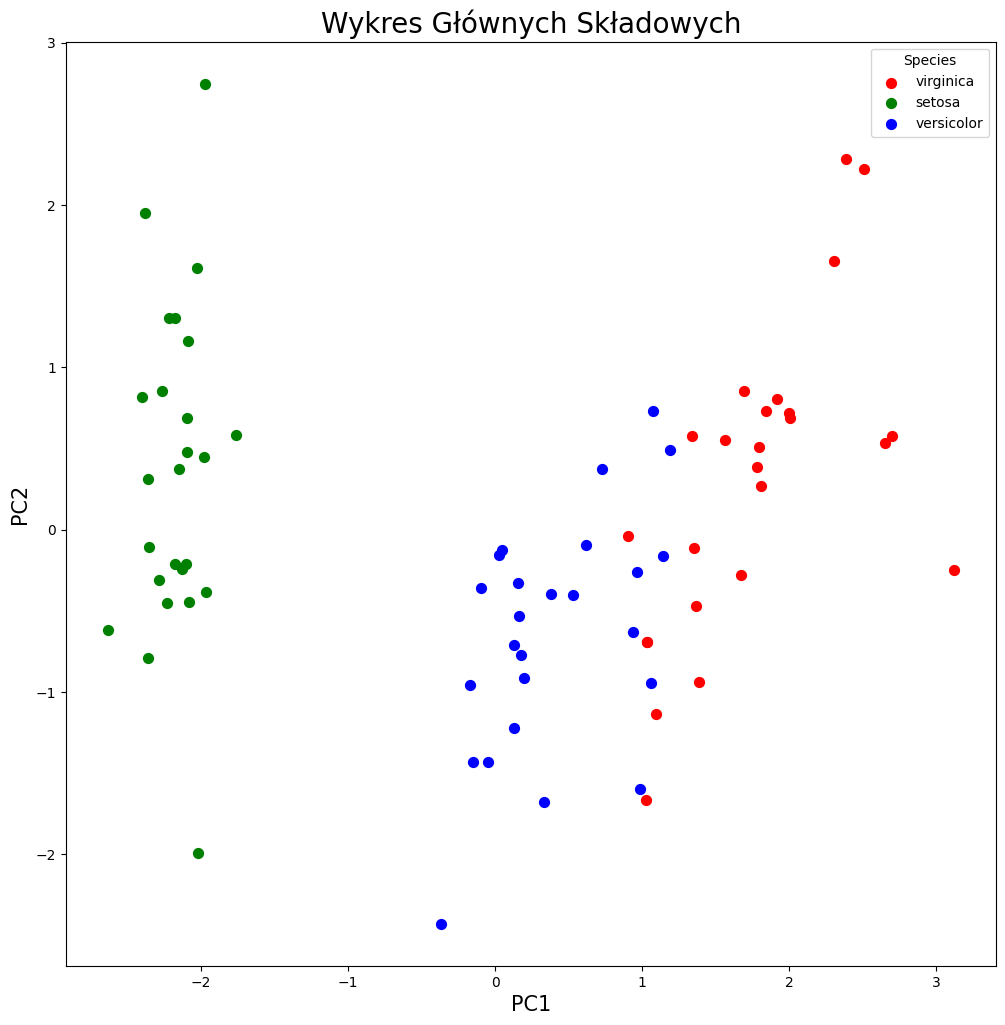

In [70]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(x=train_iris.loc[train_iris['species']=='virginica', 'PC1'],
            y=train_iris.loc[train_iris['species']=='virginica','PC2'],
            c='red', label='virginica', s=50)
plt.scatter(x=train_iris.loc[train_iris['species']=='setosa', 'PC1'],
            y=train_iris.loc[train_iris['species']=='setosa','PC2'],
            c='green', label='setosa', s=50)
plt.scatter(x=train_iris.loc[train_iris['species']=='versicolor', 'PC1'],
            y=train_iris.loc[train_iris['species']=='versicolor','PC2'],
            c='blue', label='versicolor', s=50)
plt.xlabel(xlabel='PC1', size=15)
plt.ylabel(ylabel='PC2', size=15)
plt.title('Wykres Głównych Składowych', size=20)
plt.legend(title='Species')
plt.show()

### Redukcja wymiarowości jako inżyniera cech przed Uczeniem Nadzorowanym

In [72]:
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
import datetime

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = LogisticRegression(max_iter=100000)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

results = PrettyTable(['Model',
                       'Dokładność',
                       'Czas trenowania (microseconds)'])

# Trenowanie modelu na nieprzetworzonym zbiorze
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

# Trenowanie modelu na przetworzonym zbiorze
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', scaled_data[0], scaled_data[1]])

# Trenowanie modelu na czterech Głównych Składowych
PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PC', PC4_data[0], PC4_data[1]])

# Trenowanie modelu na trzech Głównych Składowych
PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1]])

# Trenowanie modelu na dwóch Głównych Składowych
PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PC', PC2_data[0], PC2_data[1]])

# Trenowanie modelu na jednej Głównej Składowej
PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1],  y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1]])
print(results)

+-------------------+------------+--------------------------------+
|       Model       | Dokładność | Czas trenowania (microseconds) |
+-------------------+------------+--------------------------------+
| Nieskalowane dane |   0.9467   |             59839              |
|   Skalowane dane  |   0.9467   |              9972              |
|        4 PC       |   0.9467   |             10976              |
|        3 PC       |   0.9467   |             11509              |
|        2 PC       |   0.9067   |              7979              |
|        1 PC       |   0.9067   |              7976              |
+-------------------+------------+--------------------------------+
